<a href="https://colab.research.google.com/github/lucasmoratof/nlp_basic_projects/blob/master/NLP_Entity_Recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Named Entity Recognition

This notebook will cover the basics of Entity Recognition in python using spacy.



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from collections import Counter

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [0]:
got1 = pd.read_table('/content/got1.txt', header=None, delimiter='\t')

In [4]:
got1.head()

,0
0,This edition contains the complete text of the...
1,NOT ONE WORD HAS BEEN OMITTED.
2,A CLASH OF KINGS
3,A Bantam Spectra Book
4,PUBLISHING HISTORY


In [0]:
# creating the nlp obejct
nlp = spacy.load("en_core_web_sm")

In [0]:
# Loop to get the names from each line:

words_names = []

for line in got1[0]:
    
    doc= nlp(line)
    
    names = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    
    words_names.append(names)

In [13]:
# Now we need to organize them and count their frequency
names= [line for line in words_names for line in set(line)]

names_count= Counter(names).most_common(10)

print(pd.DataFrame(names_count))

         0    1
0      Jon  320
1     Arya  255
2  Joffrey  247
3  Catelyn  232
4    Theon  145
5     Robb  131
6    Sansa  129
7   Robert  120
8    Grace  116
9    Yoren   89


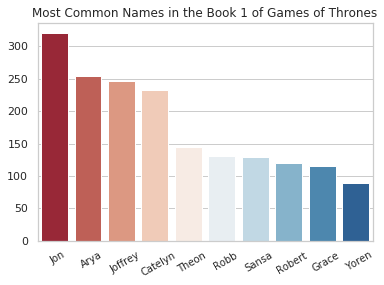

In [15]:
# To make it easier to visualize, why not a bar plot?

labels, values= zip(*names_count)

indexes = np.arange(len(labels))
width = 1

sns.set(style="whitegrid")

ax = sns.barplot(indexes, values, palette="RdBu")

plt.xticks(indexes + width * 0.1, labels, rotation=30);
plt.tick_params(axis='x', labelsize=10)
plt.title("Most Common Names in the Book 1 of Games of Thrones");

### Analysis

This notebook might seem simple, but it shows a powerful tool that spacy offers to us, its ability to predict the function of a word. Keep in mind that we didn't told the algortihm what is a name or not, it simply predict by itself. 

To get deeper in this particular case, we could iterate over the books to compare the names in each, or even the most popular ones accross the whole series.

As we use the example with names, we could explore